In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay



In [21]:
# Carga de datos
df = pd.read_csv(r"../data/final/final_dataset_v4.csv")
df.insert(0, 'status_inf', df.pop('status_inf'))
df = df.drop(columns=['conglome', 'vivienda','hogar','codperso','periodo','ocupinf_t1','ocupinf_t2','periodo'])
df

,status_inf,dpto_t1,dominio,tuvotrabajo,sector_trabajador,categoria_trabajador,trabajopara,registropersonajuridica,cuentassunat,pagosueldo,...,tiempotrabajo,alquiler,horastotales_sempasada,recibiotransferencia,recibiorenta,pension,ratiodep,region,area,ciiu_6c
0,0,1,4,1,5,3,2,99.0,99.0,1,...,9.583333,400,40,0,0,1.0,0.400000,2,1,6
1,0,1,4,1,5,3,2,99.0,99.0,1,...,1.333333,150,45,0,0,1.0,0.800000,2,1,6
2,0,1,4,1,6,2,99,1.0,1.0,0,...,29.666666,500,52,0,0,NaN,0.500000,2,1,4
3,0,1,4,1,4,1,99,2.0,1.0,0,...,41.750000,0,48,0,0,NaN,0.500000,2,1,4
4,0,1,4,1,5,3,6,1.0,1.0,1,...,0.500000,100,44,0,0,1.0,1.000000,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25164,1,23,3,1,6,2,99,2.0,2.0,0,...,17.000000,1000,60,0,1,NaN,0.571429,1,1,4
25165,0,23,3,1,8,4,6,1.0,1.0,0,...,30.000000,1000,48,0,0,1.0,0.666667,1,1,1
25166,0,23,3,1,3,3,2,99.0,99.0,1,...,2.000000,1000,42,0,0,1.0,0.666667,1,1,6
25167,0,9,5,1,9,4,5,1.0,1.0,0,...,0.250000,18,52,0,0,1.0,0.333333,2,0,1


In [22]:
print(df.info())
print("La distribución de la variable objetivo statu_inf es:")
print(df['status_inf'].value_counts())
print("La cantidad de preguntas de los datos originales (indep y objetivo) es",df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25169 entries, 0 to 25168
Data columns (total 96 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_inf               25169 non-null  int64  
 1   dpto_t1                  25169 non-null  int64  
 2   dominio                  25169 non-null  int64  
 3   tuvotrabajo              25169 non-null  int64  
 4   sector_trabajador        25169 non-null  int64  
 5   categoria_trabajador     25169 non-null  int64  
 6   trabajopara              25169 non-null  int64  
 7   registropersonajuridica  25074 non-null  float64
 8   cuentassunat             25074 non-null  float64
 9   pagosueldo               25169 non-null  int64  
 10  pagosalario              25169 non-null  int64  
 11  pagocomision             25169 non-null  int64  
 12  pagodestajo              25169 non-null  int64  
 13  pagosubvencion           25169 non-null  int64  
 14  pagohonorarios        

In [23]:
categoricas = ['sexo','estadocivil','tuvotrabajo','categoria_trabajador','sector_trabajador'
               ,'trabajopara','registropersonajuridica',
               'cuentassunat','tipocontrato','numpersonastrabajo','tuvootrotrabajo','normtrabaja',
               'disponiblehorastrabajar',
               'lenguamaterna','niveleduc','asiste_educ','usointernet','padece_enfer',
               'sintoma_malestar','enfermedad','recaida','accidente','notuvoenf',
               'puestosalud','centrosalud','centroopuesto','posta','hospital_minsa','hospital_seguro',
               'hospital_ffaa','consultorio','clinica','farmacia','domicilio','otro','no_busco',
               'no_dinero','lejos','demora_mucho','noconfia','nograve','remedio_caseros','no_seguro',
               'autoreceto','notiempo','maltrato','otro_motivo','essalud','seguroprivado',
               'eps','seguroffaa','sis','tipovivienda','materialparedes','materialpisos','materialtechos',
               'vivienda_status','viviendatitulo','agua_procedencia','conexionsshh','electricidad',
               'celular','internet','pobreza','dominio','dpto_t1','ciiu_6c','area',
               'recibiorenta','recibiotransferencia','region','pension',
               'pagosueldo','pagosalario','pagocomision','pagodestajo','pagosubvencion','pagohonorarios','pagoganancianegocio','pagoagropecuario','pagopropina','pagoespecie','pagootros','pagonorecibe']
# 'antepasadosconsidera','perteneceindig','registrosunat','deseaotrotrabajo','viviadistrito','agua_potable'
df_indep = df.drop(columns = ['status_inf'])
df_categoricas = df_indep[categoricas]
df_continuas = df_indep.drop(columns=categoricas)
print("Total de variables indep")
print(df_indep.shape[1])
print("La cantidad de variables indep categoricas:")
print(df_categoricas.shape[1])
print("La cantidad de variables indep continuas:")
print(df_continuas.shape[1])


Total de variables indep
95
La cantidad de variables indep categoricas:
84
La cantidad de variables indep continuas:
11


In [24]:
# Crear dummies a partir de las variables categóricas
df_categoricas_encoded = pd.get_dummies(df_categoricas, columns=categoricas, drop_first=True, dummy_na=False)
print('La cantidad de variables indep categóricas después de haberse convertido en dummies es:')
print(df_categoricas_encoded.shape[1])

La cantidad de variables indep categóricas después de haberse convertido en dummies es:
230


In [25]:
# El dataset final de variables independientes (categoricas convertidas a dummies + continuas)
df_indep_final = pd.concat([df_categoricas_encoded, df_continuas], axis=1)
print('La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:')
print(df_indep_final.shape[1])


La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:
241


In [26]:
df_indep_final

,sexo_2,estadocivil_2,estadocivil_3,estadocivil_4,estadocivil_5,estadocivil_6,tuvotrabajo_2,categoria_trabajador_2,categoria_trabajador_3,categoria_trabajador_4,...,edad,habitaciones,habitacionesdormir,combustible,personas_ingresos,personas_hogar,tiempotrabajo,alquiler,horastotales_sempasada,ratiodep
0,True,True,False,False,False,False,False,False,True,False,...,44,5.0,4.0,2.0,2,5,9.583333,400,40,0.400000
1,False,False,False,False,False,True,False,False,True,False,...,26,5.0,4.0,6.0,4,5,1.333333,150,45,0.800000
2,False,True,False,False,False,False,False,True,False,False,...,64,4.0,2.0,2.0,2,4,29.666666,500,52,0.500000
3,False,True,False,False,False,False,False,False,False,False,...,72,10.0,1.0,2.0,1,2,41.750000,0,48,0.500000
4,False,False,False,False,False,True,False,False,True,False,...,26,6.0,4.0,2.0,2,2,0.500000,100,44,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25164,False,True,False,False,False,False,False,True,False,False,...,61,6.0,5.0,2.0,4,7,17.000000,1000,60,0.571429
25165,False,True,False,False,False,False,False,False,False,True,...,56,7.0,6.0,2.0,4,6,30.000000,1000,48,0.666667
25166,False,False,False,False,False,True,False,False,True,False,...,29,7.0,6.0,2.0,4,6,2.000000,1000,42,0.666667
25167,False,True,False,False,False,False,False,False,False,True,...,31,3.0,1.0,9.0,2,6,0.250000,18,52,0.333333


##### Empezamos a realizar tratamiento estadístico (a partir del dataset de variables independientes (df_indep_final)):

In [27]:
# Filtrar variables con un gran número de faltantes
null_percent = df_indep_final.isnull().mean()*100
cols_null = null_percent[null_percent > 80 ].index
cols_validas = null_percent[null_percent <= 80 ].index
print(cols_null)
# df_null = df[cols_validas].copy()
# df_null.shape[1]

Index([], dtype='object')


In [28]:
# Para eliminar las variables con muy poca varianza (definido por el umbral)
varianzas = df_indep_final.var()
umbral = 0.01
vars_seleccionadas = varianzas[varianzas > umbral].index
vars_no_seleccionadas = varianzas[varianzas <= umbral].index

print("Las variables con varianza menor al umbral son:")
print(df_indep_final[vars_no_seleccionadas].nunique())
## print(df_indep_final[vars_seleccionadas].nunique())

df_indep_final=df_indep_final[vars_seleccionadas]

print("El nuevo número de variables del dataset de variables independientes es:")
print(df_indep_final.shape[1])

Las variables con varianza menor al umbral son:
categoria_trabajador_6    2
trabajopara_3             2
tipocontrato_3.0          2
tipocontrato_4.0          2
tipocontrato_5.0          2
lenguamaterna_3.0         2
lenguamaterna_5.0         2
lenguamaterna_6.0         2
lenguamaterna_7.0         2
lenguamaterna_8.0         2
centrosalud_1             2
centroopuesto_1           2
hospital_ffaa_1           2
domicilio_1               2
otro_1                    2
no_dinero_1               2
lejos_1                   2
no_seguro_1               2
maltrato_1                2
tipovivienda_5.0          2
tipovivienda_6.0          2
tipovivienda_7.0          2
materialparedes_2.0       2
materialparedes_6.0       2
materialparedes_8.0       2
materialpisos_7.0         2
materialtechos_6.0        2
materialtechos_7.0        2
materialtechos_8.0        2
vivienda_status_7         2
agua_procedencia_3        2
electricidad_3.0          2
pagocomision_1            2
pagodestajo_1             2


In [29]:
# Cálculo de la correlación entre variables y eliminar las más altas referente a un umbral (0.70):

corr_matrix = df_indep_final.corr().abs()

# 2. Seleccionamos la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

print("Variables a eliminar por alta correlación (>0.60):")
print(to_drop)

df_indep_final = df_indep_final.drop(columns=to_drop)

print("Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:")
print(df_indep_final.shape[1])

Variables a eliminar por alta correlación (>0.60):
['sector_trabajador_9', 'trabajopara_99', 'registropersonajuridica_2.0', 'registropersonajuridica_99.0', 'cuentassunat_2.0', 'cuentassunat_99.0', 'tipocontrato_99.0', 'numpersonastrabajo_5.0', 'notuvoenf_1', 'puestosalud_99', 'centrosalud_99', 'centroopuesto_99', 'posta_99', 'hospital_minsa_99', 'hospital_seguro_99', 'hospital_ffaa_99', 'consultorio_99', 'clinica_99', 'farmacia_99', 'domicilio_99', 'otro_99', 'no_busco_99', 'no_dinero_99', 'lejos_99', 'demora_mucho_99', 'noconfia_99', 'nograve_99', 'remedio_caseros_99', 'no_seguro_99', 'autoreceto_99', 'notiempo_99', 'maltrato_99', 'otro_motivo_99', 'essalud_1', 'essalud_2', 'eps_2', 'seguroffaa_1', 'seguroffaa_2', 'sis_2', 'vivienda_status_6', 'viviendatitulo_99.0', 'agua_procedencia_2', 'conexionsshh_2', 'pobreza_3', 'dpto_t1_11', 'dpto_t1_15', 'dpto_t1_23', 'ciiu_6c_6', 'region_2', 'region_3', 'pagosueldo_1', 'pagosalario_1', 'pagoganancianegocio_1', 'habitacionesdormir', 'personas_

### Corremos un xgboost

In [30]:
df_model_xgb = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25169 entries, 0 to 25168
Columns: 147 entries, status_inf to ratiodep
dtypes: bool(139), float64(3), int64(5)
memory usage: 4.9 MB


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

     Clase 0     0.8412    0.9625    0.8978      4134
     Clase 1     0.4901    0.1656    0.2475       900

    accuracy                         0.8200      5034
   macro avg     0.6657    0.5640    0.5726      5034
weighted avg     0.7785    0.8200    0.7815      5034



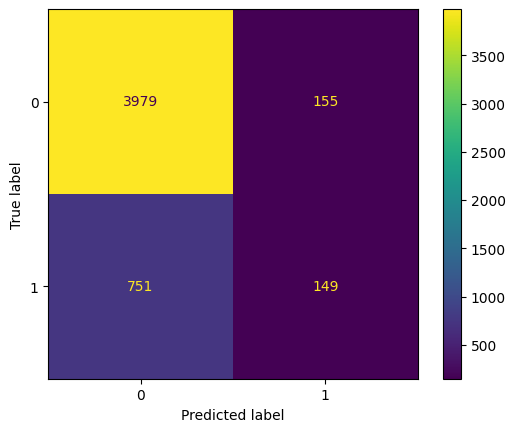

In [31]:
# XGBoost sin rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)


4.591502360455429


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:33:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

     Clase 0     0.8793    0.7804    0.8269      4134
     Clase 1     0.3348    0.5078    0.4035       900

    accuracy                         0.7316      5034
   macro avg     0.6070    0.6441    0.6152      5034
weighted avg     0.7819    0.7316    0.7512      5034



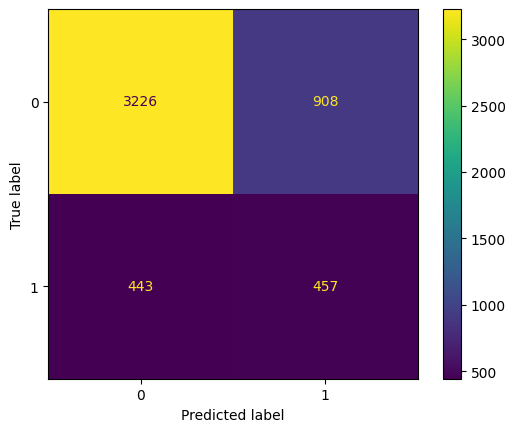

In [32]:
# XGBoost con rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import plot_importance

# Obtener las importancias en formato de DataFrame
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame ordenado
print(importances)


                    Feature  Importance
8    categoria_trabajador_3    0.104013
17            trabajopara_2    0.030818
20         tipocontrato_2.0    0.029248
21         tipocontrato_6.0    0.018481
132               ciiu_6c_3    0.015915
..                      ...         ...
70      materialparedes_3.0    0.003351
97           conexionsshh_6    0.003299
74      materialparedes_9.0    0.003202
91       agua_procedencia_5    0.002509
114               dpto_t1_6    0.002424

[146 rows x 2 columns]


In [34]:
print(importances)


                    Feature  Importance
8    categoria_trabajador_3    0.104013
17            trabajopara_2    0.030818
20         tipocontrato_2.0    0.029248
21         tipocontrato_6.0    0.018481
132               ciiu_6c_3    0.015915
..                      ...         ...
70      materialparedes_3.0    0.003351
97           conexionsshh_6    0.003299
74      materialparedes_9.0    0.003202
91       agua_procedencia_5    0.002509
114               dpto_t1_6    0.002424

[146 rows x 2 columns]


#### Corriendo ahora un Random Forest:

In [35]:
# Crear el nuevo DataFrame sin valores faltantes

df_model_rf = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_rf = df_model_rf.dropna()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4032
           1       0.61      0.07      0.12       874

    accuracy                           0.83      4906
   macro avg       0.72      0.53      0.51      4906
weighted avg       0.79      0.83      0.76      4906



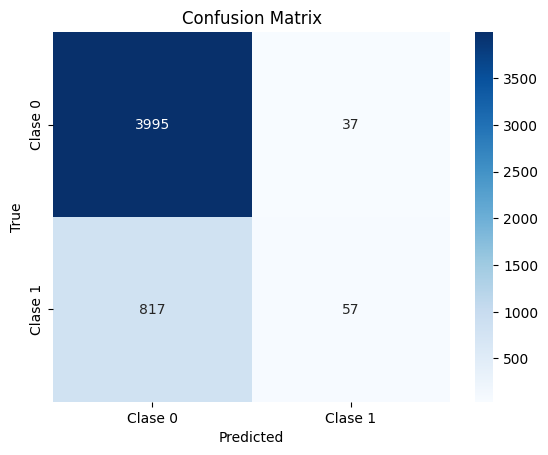

In [36]:
# Random Forest sin rebalanceo
df_model_rf_noreb=df_model_rf

# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf_noreb.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf_noreb['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 5. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      4032
           1       0.32      0.58      0.41       874

    accuracy                           0.70      4906
   macro avg       0.60      0.66      0.61      4906
weighted avg       0.79      0.70      0.73      4906



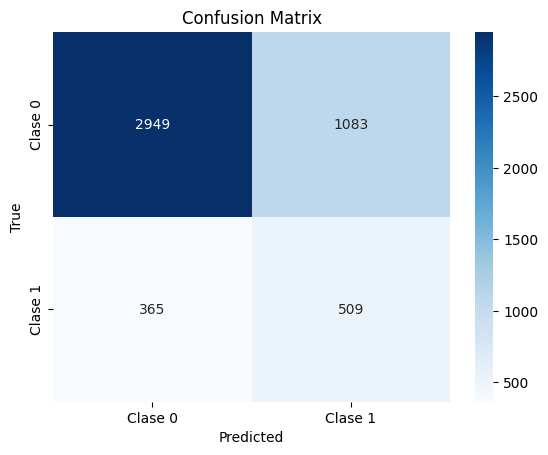

In [37]:
# Random Forest con rebalanceo

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_model_rf_reb=df_model_rf


# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Crear y entrenar el modelo Random Forest con ajuste de pesos
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Ajuste de class_weight
rf_model.fit(X_train_resampled, y_train_resampled)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Ajustar el umbral de decisión para mejorar recall de la clase 1
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
y_pred_adjusted = (y_proba > 0.3).astype(int)  # Ajustar el umbral de 0.5 a 0.3

# 7. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Corriendo ahora el Lasso sobre el dataset post std treatment:


In [38]:
df_lasso = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_lasso = df_model_rf.dropna()
df_lasso_status_inf = df_lasso['status_inf']


In [39]:
X = df_lasso.drop(columns=['status_inf'])
y = df_lasso['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
coef_abs = np.abs(lasso.coef_)

weights = 1 / (coef_abs + 1e-5)  

lasso_adaptive = Lasso(alpha=1.0)
lasso_adaptive.fit(X_train * weights, y_train)

# coeficientes del Lasso Adaptativo
print(f'Coeficientes del Lasso Adaptativo: {lasso_adaptive.coef_}')

# Identificamos las variables que se mantienen (coeficientes no cercanos a cero)
selected_features = X.columns[lasso_adaptive.coef_ != 0]
print(f'Variables seleccionadas: {selected_features}')

# Filtramos el dataset eliminando las variables no seleccionadas
X_selected = X[selected_features]

Coeficientes del Lasso Adaptativo: [-7.23414797e-09 -1.14246394e-07  3.38858797e-08 -2.39044835e-07
  7.07812655e-08  9.14477811e-08  2.47402763e-07  7.29925823e-07
 -1.37197398e-06 -1.96500230e-06 -1.24878411e-06 -1.08702711e-06
 -7.78276596e-07 -1.07110651e-06 -6.81062272e-07 -3.24295402e-07
  2.84528704e-07  2.53051373e-08  4.89336770e-07  4.70739675e-07
  6.04934512e-07  6.06511518e-07  1.58762581e-06 -2.09953883e-07
 -7.56958993e-08 -1.43769300e-07 -1.08212870e-06 -3.59601777e-07
 -1.70246682e-07 -7.91636054e-08 -1.44783020e-07 -5.83677542e-08
 -2.79353756e-07 -2.72965107e-07 -4.19043657e-07 -6.25978361e-07
 -7.12508179e-07 -9.87299673e-07 -5.33805215e-07 -9.61810817e-07
 -1.12232226e-06 -1.09128433e-07  1.44856748e-07  4.99862827e-08
  2.22228556e-07  1.77086399e-07  3.27039385e-07  3.15387801e-07
  5.79054607e-07 -5.79704803e-07  1.52757511e-07 -5.17614913e-07
 -2.41941335e-07 -1.91295990e-07  2.13753128e-08 -1.24398789e-07
 -1.88211989e-07 -2.60671154e-07 -1.30869098e-07  5.346

In [40]:
X_selected.shape[1]

144

In [41]:
# Logit 
df_lasso_final = pd.concat([X_selected, df_lasso_status_inf], axis=1)

from sklearn.linear_model import LogisticRegression

X = df_lasso_final.drop(columns=['status_inf'])  # Eliminamos la columna dependiente
y = df_lasso_final['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logit_model = LogisticRegression(solver='liblinear')  # 'liblinear' es adecuado para pequeños datasets
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4033
           1       0.50      0.10      0.17       873

    accuracy                           0.82      4906
   macro avg       0.67      0.54      0.53      4906
weighted avg       0.77      0.82      0.77      4906

